In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import folium
import scipy as sc


In [2]:
df = pd.read_csv('dataset_cybersecurity_michelle.csv')
df_trimmed = df.sample(n=100, random_state = 42)

df_trimmed.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
100599,2,0,0,5,0,0,0,0,0,0,...,1,2,1,12478,1,0,0,0,0,1
79582,2,0,2,1,0,2,0,1,0,0,...,1,2,0,19923,1,0,0,0,0,1
36808,4,12,0,6,1,1,0,0,0,0,...,2,3,0,5139,1,0,0,0,1,1
92391,2,0,0,0,0,0,0,0,0,0,...,1,4,0,244,1,0,0,0,0,0
102384,3,3,2,7,0,2,0,1,0,0,...,1,4,1,580,0,1,0,0,0,1


In [3]:
#Check for null values and get summary stats

df_trimmed.isnull().sum() # zero
df_trimmed.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.0,100.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.00,100.000000
mean,2.44000,0.610000,0.190000,1.65000,0.030000,0.340000,0.030000,0.37000,0.0,0.0,...,1.140000,2.830000,1.640000,5157.230000,0.510000,0.180000,0.0,0.0,0.01,0.370000
std,2.16641,1.745962,0.787465,2.19446,0.171447,1.046591,0.171447,1.63704,0.0,0.0,...,0.876402,1.463737,1.605043,6568.778284,0.502418,0.657206,0.0,0.0,0.10,0.485237
min,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.0,0.00,0.000000
25%,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,1.000000,2.000000,1.000000,290.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000
50%,2.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,1.000000,2.000000,1.000000,1093.500000,1.000000,0.000000,0.0,0.0,0.00,0.000000
75%,2.00000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,1.000000,4.000000,2.000000,9813.500000,1.000000,0.250000,0.0,0.0,0.00,1.000000
max,15.00000,12.000000,6.000000,9.00000,1.000000,6.000000,1.000000,10.00000,0.0,0.0,...,5.000000,12.000000,7.000000,21599.000000,1.000000,3.000000,0.0,0.0,1.00,1.000000


In [4]:
# Hypothesis testing ----> alpha level: 0.05
from scipy.stats import ttest_ind
label_col = 'phishing'  # change to your actual label column name

ttest_results = {}

alphaLevel = 0.01

for col in df.columns:
    if col != label_col and pd.api.types.is_numeric_dtype(df[col]):
        group0 = df[df[label_col] == 0][col].dropna()
        group1 = df[df[label_col] == 1][col].dropna()
        if len(group0) > 1 and len(group1) > 1:
            t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
            ttest_results[col] = p_value

# Convert the results to a DataFrame
ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index', columns=['p_value'])

# Filter features with p-value less than alpha
significant_features = ttest_df[ttest_df['p_value'] < alphaLevel].index.tolist()
significant_features.append(label_col)
# Display the significant features
print("Features with p-value less than alpha:")
print(significant_features)

filtered_df = df_trimmed[significant_features]
print(len(filtered_df.columns))
print(len(df_trimmed.columns))

filtered_df.to_csv('output.csv', index=False)
    

Features with p-value less than alpha:
['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_f

In [5]:
# Find correlation among dataset

# Calculate correlation with phishing column
correlation_with_phishing = filtered_df.corr()['phishing']

# Define threshold for near zero correlation
threshold = 0.4

# Select columns to keep (absolute correlation > threshold)
columns_to_keep = correlation_with_phishing[correlation_with_phishing.abs() > threshold].index

# Filter dataframe
filtered_df = filtered_df[columns_to_keep]

print(len(filtered_df.columns))

54


In [6]:
#Find outliers

from scipy.stats import zscore

# Select only numeric columns for z-score calculation
numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns
# Calculate z-scores for numeric columns
z_scores = np.abs(zscore(filtered_df[numeric_cols], nan_policy='omit'))

# Find rows where any column has a z-score > 3 (outlier)
outlier_mask = (z_scores > 3).any(axis=1)

# Get the outlier rows
outlier_rows = filtered_df[outlier_mask]

# Print the number of outlier rows and show the first 5
print(f"Number of outlier rows: {outlier_rows.shape[0]}")
print("First 5 outlier rows:")
print(outlier_rows.head(20))

#Find that outliers are a sign of phising urls


Number of outlier rows: 16
First 5 outlier rows:
        qty_slash_url  qty_equal_url  length_url  qty_dot_domain  \
36808               6              1         143               1   
25928               2              2         103               2   
30260               4              0         110               2   
80183               0              0          30               4   
33293               3              3         130               2   
102706              5              3         234               1   
63243               2              0          53               1   
40890               4              0          73               2   
57156               5              6         284               2   
128926              6              1          98               1   
120401              1              3         165               1   
45533               4              0          85               2   
112248              5              0         180               2   

In [7]:
# Select only numeric columns for z-score calculation (excluding the label 'phishing' if you want)
numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns.drop('phishing', errors='ignore')

# Calculate z-scores for numeric columns
z_scores = np.abs(zscore(filtered_df[numeric_cols], nan_policy='omit'))

# Mark rows as outliers if any z-score > 3
filtered_df['is_outlier'] = (z_scores > 3).any(axis=1).astype(int)

# Show the first few rows to verify
print(filtered_df[['is_outlier', 'phishing']].head(10))

# Optionally, save to a new CSV
# df.to_csv('output_with_outlier.csv', index=False)

correlation = filtered_df['is_outlier'].corr(df['phishing'])

print("Correlation:", correlation)

filtered_df.to_csv('finalData.csv',index=False)

        is_outlier  phishing
100599           0         1
79582            0         1
36808            1         1
92391            0         0
102384           0         1
25928            1         1
21665            0         0
30260            1         0
72451            0         0
89985            0         0
Correlation: 0.40000229820998173


In [38]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 20.1 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Make decision tree model
import pandas as pd
import joblib

# Load the dataset and name it df_final
df_final = pd.read_csv('finalData.csv')

# Separate features and target
X = df_final.drop('phishing', axis=1)
y = df_final['phishing']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print("=== Decision Tree Results ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

#Save the model
joblib.dump(tree, 'phishing_model.pkl')

=== Decision Tree Results ===
Confusion Matrix:
 [[11  2]
 [ 1  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.75      0.86      0.80         7

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20

Accuracy: 0.85


['phishing_model.pkl']

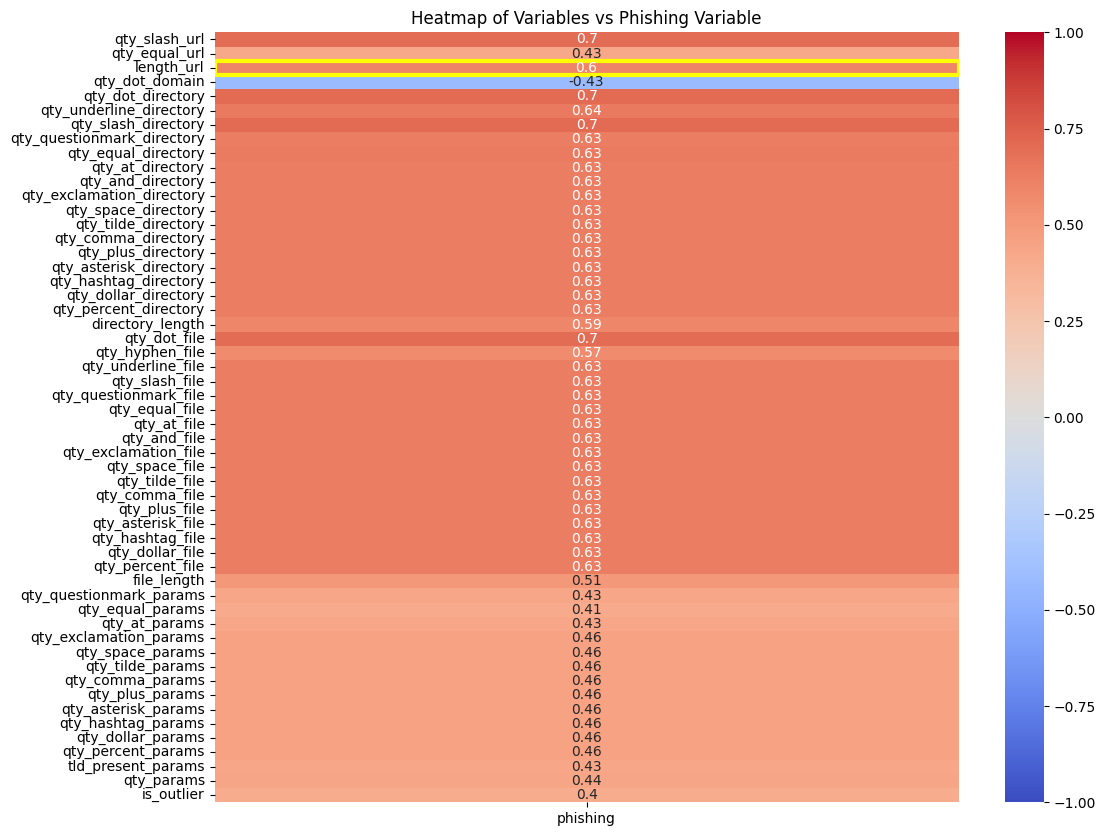

In [9]:
import matplotlib.patches as patches

#Heatmap for each variable vs phishing
# Assuming df is your DataFrame with features and a 'phishing' column
corr_matrix = df_final.corr()
corr_with_phishing = corr_matrix[['phishing']].drop('phishing')

plt.figure(figsize=(12, 10))
ax = sb.heatmap(corr_with_phishing, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Variables vs Phishing Variable')
# Highlight the cell for 'variable3' vs 'phishing'
row_idx = 2  # variable3 is the third row (index 2)
col_idx = 0  # phishing is the first column (index 0)
rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='yellow', linewidth=3)
ax.add_patch(rect)

plt.show()

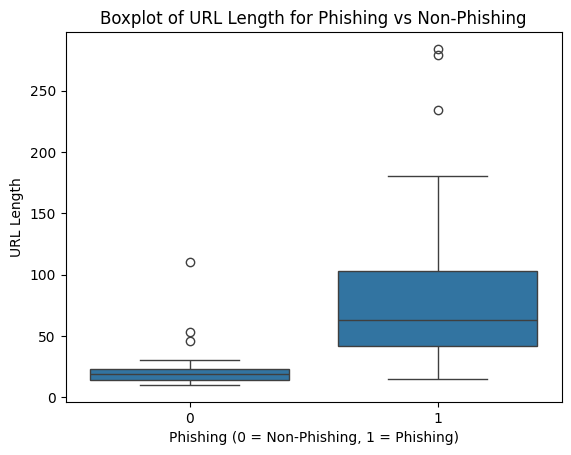

In [10]:
#Boxplot 
sb.boxplot(x='phishing', y='length_url', data=df_final)
plt.title('Boxplot of URL Length for Phishing vs Non-Phishing')
plt.xlabel('Phishing (0 = Non-Phishing, 1 = Phishing)')
plt.ylabel('URL Length')
plt.show()

In [14]:
%pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install dash_html_components


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install dash_core_components


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from urllib.parse import urlparse, parse_qs

def count_char(s, c):
    return s.count(c) if s else 0

def get_tld(domain):
    # Simple heuristic for TLD presence:
    # check if domain has a dot and a valid TLD after last dot
    if not domain or '.' not in domain:
        return 0
    tld = domain.split('.')[-1]
    # A basic list of common TLDs (expand if needed)
    common_tlds = {
        'com', 'org', 'net', 'gov', 'edu', 'io', 'co', 'us', 'uk', 'de', 'jp',
        'fr', 'au', 'ca', 'cn', 'in', 'ru', 'ch', 'it', 'nl', 'se', 'no'
    }
    return 1 if tld.lower() in common_tlds else 0

def extract_url_features(url):
    parsed = urlparse(url)
    
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query

    # Directory is basically the path without the filename (if any)
    # filename is last segment if contains a dot (like index.html)
    segments = path.strip('/').split('/')
    filename = ''
    directory = path
    if segments and '.' in segments[-1]:
        filename = segments[-1]
        directory = '/' + '/'.join(segments[:-1]) + '/'
    else:
        filename = ''
        directory = path if path.endswith('/') else path + '/'

    # Query params parsed
    params = parse_qs(query)

    # Build features dictionary:
    features = {
        'qty_slash_url': count_char(url, '/'),
        'qty_equal_url': count_char(url, '='),
        'length_url': len(url),
        'qty_dot_domain': count_char(domain, '.'),
        'qty_dot_directory': count_char(directory, '.'),
        'qty_underline_directory': count_char(directory, '_'),
        'qty_slash_directory': count_char(directory, '/'),
        'qty_questionmark_directory': count_char(directory, '?'),
        'qty_equal_directory': count_char(directory, '='),
        'qty_at_directory': count_char(directory, '@'),
        'qty_and_directory': count_char(directory, '&'),
        'qty_exclamation_directory': count_char(directory, '!'),
        'qty_space_directory': count_char(directory, ' '),
        'qty_tilde_directory': count_char(directory, '~'),
        'qty_comma_directory': count_char(directory, ','),
        'qty_plus_directory': count_char(directory, '+'),
        'qty_asterisk_directory': count_char(directory, '*'),
        'qty_hashtag_directory': count_char(directory, '#'),
        'qty_dollar_directory': count_char(directory, '$'),
        'qty_percent_directory': count_char(directory, '%'),
        'directory_length': len(directory),
        'qty_params_url': len(params),
        'tld_present_url': get_tld(domain),
        'qty_dot_url': count_char(url, '.'),
        'qty_underline_url': count_char(url, '_'),
        'qty_questionmark_url': count_char(url, '?'),
        'qty_and_url': count_char(url, '&'),
        'qty_exclamation_url': count_char(url, '!'),
        'qty_space_url': count_char(url, ' '),
        'qty_tilde_url': count_char(url, '~'),
        'qty_comma_url': count_char(url, ','),
        'qty_plus_url': count_char(url, '+'),
        'qty_asterisk_url': count_char(url, '*'),
        'qty_hashtag_url': count_char(url, '#'),
        'qty_dollar_url': count_char(url, '$'),
        'qty_percent_url': count_char(url, '%'),
        'url_length': len(url),
        'domain_length': len(domain),
        'directory_length.1': len(directory),  # same as directory_length
        'file_length': len(filename),
        'qty_dot_params': 0,
        'qty_equal_params': 0,
        'qty_at_params': 0,
        'qty_and_params': 0,
        'qty_exclamation_params': 0,
        'qty_space_params': 0,
        'qty_tilde_params': 0,
        'qty_comma_params': 0,
        'qty_plus_params': 0,
        'qty_asterisk_params': 0,
        'qty_hashtag_params': 0,
        'qty_dollar_params': 0,
        'qty_percent_params': 0,
        'tld_present_params': 0,
        'qty_params': len(params),
    }

    # Combine all param keys and values into one string for counting chars and TLD
    params_string = ''
    for k, v_list in params.items():
        params_string += k
        for v in v_list:
            params_string += v

    features['qty_dot_params'] = count_char(params_string, '.')
    features['qty_equal_params'] = count_char(params_string, '=')
    features['qty_at_params'] = count_char(params_string, '@')
    features['qty_and_params'] = count_char(params_string, '&')
    features['qty_exclamation_params'] = count_char(params_string, '!')
    features['qty_space_params'] = count_char(params_string, ' ')
    features['qty_tilde_params'] = count_char(params_string, '~')
    features['qty_comma_params'] = count_char(params_string, ',')
    features['qty_plus_params'] = count_char(params_string, '+')
    features['qty_asterisk_params'] = count_char(params_string, '*')
    features['qty_hashtag_params'] = count_char(params_string, '#')
    features['qty_dollar_params'] = count_char(params_string, '$')
    features['qty_percent_params'] = count_char(params_string, '%')

    # Check TLD presence in any param value or key
    # We just reuse get_tld with domains from param values that look like domains
    tld_found = 0
    for v in params.keys():
        if get_tld(v):
            tld_found = 1
            break
    if not tld_found:
        for vals in params.values():
            for val in vals:
                if get_tld(val):
                    tld_found = 1
                    break
            if tld_found:
                break

    features['tld_present_params'] = tld_found

    return features

In [19]:
#Dashboard

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px
import joblib

#Load the model
model = joblib.load('phishing_model.pkl')

# Read the data from the csv
phishing_df = pd.read_csv("finalData.csv")

# Create a dash application
app = dash.Dash(__name__)

url_features = phishing_df.columns.unique()

# Create the options list with a default 'All Sites' option
dropdown_options = [{'label': 'length_url', 'value': 'default'}]
dropdown_options += [{'label': feature, 'value': feature} for feature in url_features]

# Define prediction function
def predict_phishing_from_url(url):
    features = extract_url_features(url)
    FEATURE_COLUMNS = phishing_df.drop(columns=['phishing']).columns.tolist()
    df_features = pd.DataFrame([features], columns=FEATURE_COLUMNS) 
    prediction = model.predict(df_features)[0]
    return "Phishing" if prediction == 1 else "Legitimate"

# Create an app layout
app.layout = html.Div(children=[html.H1('Phishing URL Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                

                                dcc.Dropdown(id='feature-dropdown',
                                             options=dropdown_options,
                                             value="default",
                                             placeholder="Pick feature",
                                             searchable=True,
                                            ),

                                html.Br(),

                                # TASK 2: Add a boxplot and a heatmap higlighting the given feature
                                html.Div([dcc.Graph(id='feature-boxplot-chart', style={'width': '50%', 'display': 'inline-block'}),
                                         dcc.Graph(id='URL-feature-heatmap-chart', style={'width': '50%', 'display': 'inline-block'})]),
                                html.Br(),
                                
                                # Textbox and button
                                html.Div([
                                    dcc.Input(
                                        id='user-text-input',
                                        type='text',
                                        placeholder='Enter a feature or note...',
                                        style={'marginRight': '10px'}
                                    ),
                                    html.Button('Submit', id='submit-button', n_clicks=0)
                                ], style={'textAlign': 'center'}),

                                html.Br(),

                                # Hidden store to keep value
                                dcc.Store(id='stored-user-input'),

                                html.Div(id='output-area', style={'textAlign': 'center', 'fontSize': 20, 'fontWeight': 'bold'})  # show stored value

                                ])

# Add a callback function for `feature-dropdown` as input, `feature-boxplot-chart` as output
@app.callback(Output(component_id='feature-boxplot-chart',component_property='figure'),
              Input(component_id='feature-dropdown', component_property='value'))
def get_boxplot_chart(entered_feature):
    if entered_feature == 'default':
       fig = px.box(phishing_df, x='phishing', y='length_url', 
             labels={'phishing': 'Phishing (0=Non-Phishing, 1=Phishing)', 'length_url': 'length_url'},
             title='Boxplot of URL Length by Phishing Status')
    else:
        fig = px.box(phishing_df, x='phishing', y= entered_feature,
        labels={'phishing': 'Phishing (0=Non-Phishing, 1=Phishing)', entered_feature: entered_feature},
             title=f'Boxplot of {entered_feature} by Phishing Status')
        
    return fig

# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='URL-feature-heatmap-chart', component_property='figure'),
              Input(component_id='feature-dropdown', component_property='value'))
def get_heatmap_chart(entered_feature):
    
    if entered_feature == 'default':
        # Generate heatmap plot for all features
        corr_matrix = phishing_df.corr()
        
        fig = px.imshow(
            corr_matrix,
            color_continuous_scale="Inferno_r", 
            title="Correlation Heatmap"
        )    
        # Suppose you want to highlight the cell at (feature_name, phishing)
        feature_name = "length_url"  
        phishing_col = "phishing"

        # Get the position (row, col) of the feature and 'phishing'
        row_idx = list(corr_matrix.index).index(feature_name)
        col_idx = list(corr_matrix.columns).index(phishing_col)

        # Add a rectangle shape around the cell
        fig.add_shape(
            type="rect",
            x0=col_idx-0.5, x1=col_idx+0.5,
            y0=row_idx-0.5, y1=row_idx+0.5,
            line=dict(color="yellow", width=4),
            fillcolor="rgba(0,0,0,0)"
        )

    else:
        # Generate heatmap plot for all features
        corr_matrix = phishing_df.corr()
        
        fig = px.imshow(
            corr_matrix,
            color_continuous_scale="Inferno_r", 
            title="Correlation Heatmap"
        )    
        # Suppose you want to highlight the cell at (feature_name, phishing)
        feature_name = entered_feature  # Replace with your feature
        phishing_col = "phishing"

        # Get the position (row, col) of the feature and 'phishing'
        row_idx = list(corr_matrix.index).index(feature_name)
        col_idx = list(corr_matrix.columns).index(phishing_col)

        # Add a rectangle shape around the cell
        fig.add_shape(
            type="rect",
            x0=col_idx-0.5, x1=col_idx+0.5,
            y0=row_idx-0.5, y1=row_idx+0.5,
            line=dict(color="yellow", width=4),
            fillcolor="rgba(0,0,0,0)"
        )
    return fig

@app.callback(
    Output('output-area', 'children'),
    Output('user-text-input', 'value'),
    Input('submit-button', 'n_clicks'),
    dash.State('user-text-input', 'value'),
    prevent_initial_call=True
)
def handle_user_input(n_clicks, input_text):
    if input_text:
        try:
            prediction = predict_phishing_from_url(input_text)
            return f"Prediction: {prediction}", ''  # Show result, clear input
        except Exception as e:
            return f"Error during prediction: {e}", ''
    return "No input provided.", ''

# Run the app
if __name__ == '__main__':
    app.run()